# Derivation of beam shape functions: Alternative coordinates

In this notebook we aim to derive the cubic  functions that describe the shape of a Bernoulli-Euler beam. The python package `sympy` is used for the symbolic manipulations.

The deflection of the beam is here considered in axes $x-y$, with the deflection $v=N_1 V_1+h N_2 V_2+N_3 V_3+h N_4 V_4$ positive upwards, along the $y$ axis.

In [1]:
from sympy import *

Each of the four shape functions of a beam will be expressed in the parametric coordinate $\gamma$, as a cubic function $N_k=a_k+b_k \gamma+c_k \gamma^2+d_k\gamma^3$, where each of the coefficients $a$, ..., $d$ is different for each shape function. Instead of using subscripts or superscripts, we keep the names the same, but each shape function has a set of different values.

In [2]:
gamma = symbols('gamma')
a, b, c, d = symbols('a b c d')
N = a + b * gamma + c * gamma**2 + d * gamma**3

The derivatives of these functions may be expressed as

In [3]:
dNdg = diff(N, gamma)
d2Ndg2 = diff(N, gamma, 2)
d3Ndg3 = diff(N, gamma, 3)
print(dNdg)
print(d2Ndg2)
print(d3Ndg3)

b + 2*c*gamma + 3*d*gamma**2
2*(c + 3*d*gamma)
6*d


The four coefficients for each of the four shape functions may be computed from four conditions: these conditions are the value and slope of the shape function at either end of the interval $0\le \gamma \le +1$. For instance, the first shape function, $N_1$, should have a value of +1 at $\gamma=0$. So the polynomial expression proposed above evaluated at  $\gamma=0$ reads

In [4]:
N.subs(gamma, 0)

a

and should be equal to 1. Further, the slope at $\gamma=0$ and the value and the slope at $\gamma=+1$ should all be zero.

In [5]:
dNdg.subs(gamma, 0)

b

In [6]:
N.subs(gamma, +1)

a + b + c + d

In [7]:
dNdg.subs(gamma, +1)

b + 2*c + 3*d

Thus we have these four equations
$$
\begin{array}{l}
a=1 \\
b=0 \\
a+b+c+d=0 \\
b+2c+3d=0
\end{array}
$$
and we can solve them for the coefficients $a, b, c, d$.

The system of equations can be written and solved as:

In [8]:
sol = solve([Eq(N.subs(gamma, 0), +1), 
             Eq(dNdg.subs(gamma, 0), 0), 
             Eq(N.subs(gamma, 1), 0), 
             Eq(dNdg.subs(gamma, 1), 0)])
print(sol)
N1 = sum(coeff*gamma**j for j, coeff in enumerate(sol.values()))
print('N1 = ', N1)

{a: 1, b: 0, c: -3, d: 2}
N1 =  2*gamma**3 - 3*gamma**2 + 1


Hence, the first shape function is written
as $N_1 = 2\gamma^3 - 3\gamma^2 + 1$.

The second shape function should correspond to a positive unit rotation at $\gamma=0$, and therefore to a positive slope. 

In [9]:
sol = solve([Eq(N.subs(gamma, 0), 0), 
             Eq(dNdg.subs(gamma, 0), +1), 
             Eq(N.subs(gamma, 1), 0), 
             Eq(dNdg.subs(gamma, 1), 0)])
print(sol)
N2 = sum(coeff*gamma**j for j, coeff in enumerate(sol.values()))
print('N2 = ', N2)

{a: 0, b: 1, c: -2, d: 1}
N2 =  gamma**3 - 2*gamma**2 + gamma


The second shape function is therefore $N_2=\gamma^3 - 2\gamma^2 + \gamma$.

The third shape function should have a value of +1 at $\gamma=+1$.

In [10]:
sol = solve([Eq(N.subs(gamma, 0), 0), 
             Eq(dNdg.subs(gamma, 0), 0), 
             Eq(N.subs(gamma, 1), +1), 
             Eq(dNdg.subs(gamma, 1), 0)])
print(sol)
N3 = sum(coeff*gamma**j for j, coeff in enumerate(sol.values()))
print('N3 = ', N3)

{a: 0, b: 0, c: 3, d: -2}
N3 =  -2*gamma**3 + 3*gamma**2


Which gives $N_3=-2\gamma^3 + 3\gamma^2$

Finally, the fourth shape function should represent rotation at $\gamma=+1$ (and again, the slope is positive).

In [11]:
sol = solve([Eq(N.subs(gamma, 0), 0), 
             Eq(dNdg.subs(gamma, 0), 0), 
             Eq(N.subs(gamma, 1), 0), 
             Eq(dNdg.subs(gamma, 1), +1)])
print(sol)
N4 = sum(coeff*gamma**j for j, coeff in enumerate(sol.values()))
print('N4 = ', N4)

{a: 0, b: 0, c: -1, d: 1}
N4 =  gamma**3 - gamma**2


The fourth shape function is therefore $N_4=\gamma^3 - \gamma^2$.

Here is a graphical representation of the four shaped functions.

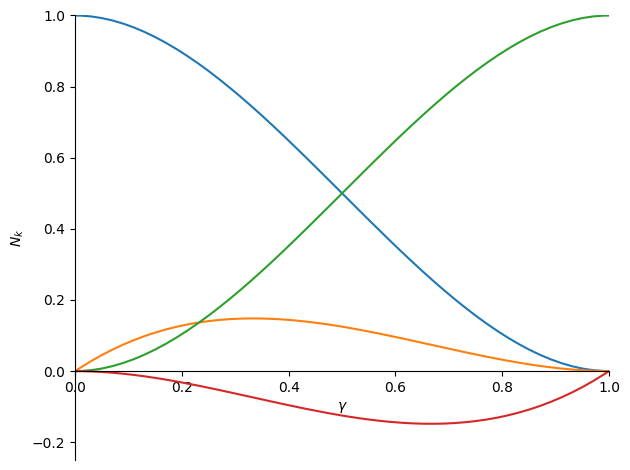

In [12]:
plot(N1, N2, N3, N4, xlim=(0, 1), ylim=(-0.25, 1), xlabel='$\\gamma$', ylabel='$N_k$')